As a term, data analytics predominantly refers to an assortment of applications, from basic business 
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced 
analytics. In that sense, it's similar in nature to business analytics, another umbrella term for 
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while 
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some 
cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate 
category. Data analytics initiatives can help businesses increase revenues, improve operational 
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to 
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of 
boosting business performance. Depending on the particular application, the data that's analyzed 
can consist of either historical records or new information that has been processed for real-time 
analytics uses. In addition, it can come from a mix of internal systems and external data sources. At 
a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find 
patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical 
techniques to determine whether hypotheses about a data set are true or false. EDA is often 
compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a 
distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data 
analytics can also be separated into quantitative data analysis and qualitative data analysis. The 
former involves analysis of numerical data with quantifiable variables that can be compared or 
measured statistically. The qualitative approach is more interpretive -- it focuses on understanding 
the content of non-numerical data like text, images, audio and video, including common phrases, 
themes and points of view

Feed the following paragraph into your favourite data analytics tool, and answer the following;

a. What is the probability of the word “data” occurring in each line ?

b. What is the distribution of distinct word counts across all the lines ?

c. What is the probability of the word “analytics” occurring after the word “data” ?

In [30]:
import re
from collections import Counter
import pandas as pd
import seaborn as sns
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [31]:
text = """As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view"""

In [32]:
def tokenize(string):
    return re.compile('\w+').findall(string)

def word_freq(string): 
    text = tokenize(string.lower())
    c = Counter(text)          
    d = Counter(''.join(text)) 
    return (dict(c))  

def return_word_freq(string): 
    text = tokenize(string.lower())
    c = Counter(text)           
    d = Counter(''.join(text))  
    return (dict(c), dict(d))   

In [33]:
text = text.lower()
text

"as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics. in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. the expansive view of the term isn't universal, though: in some cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate category. data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. depending on the particular application, the data that's analyzed can consist of

In [34]:
line = text.split("--")

In [35]:
line

["as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics. in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data ",
 " with the difference that the latter is oriented to business uses, while data analytics has a broader focus. the expansive view of the term isn't universal, though: in some cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate category. data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals ",
 " all with the ultimate goal of boosting business performance. depending on the particular application, the data that's analyzed can con

In [36]:
nlines = len(line)
nlines

5

In [37]:
words = word_freq(text) 
words_, letters = return_word_freq(text)

sumWords = sum(words.values())      
sumLetters = sum(letters.values()) 

In [38]:
data_count = words['data']
analytics_count = words['analytics']

In [39]:
probablity_of_data_appearing_in_every_line = data_count/nlines

In [40]:
#a. What is the probability of the word “data” occurring in each line ?
probablity_of_data_appearing_in_every_line

3.6

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

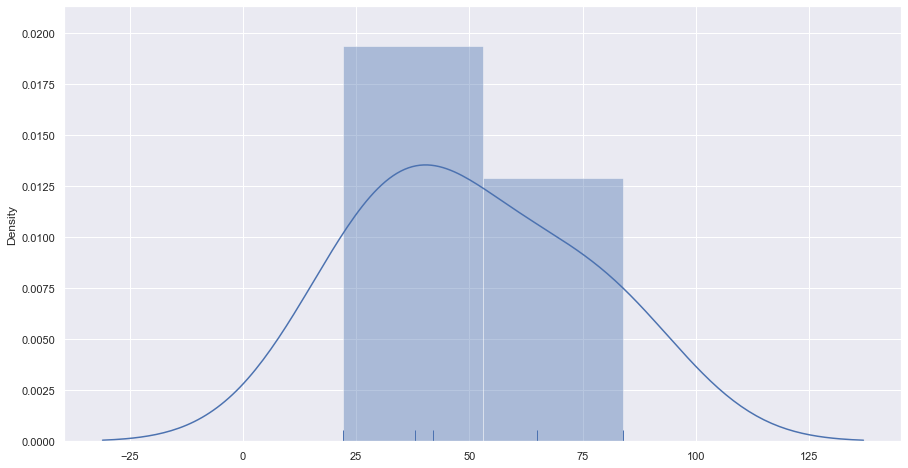

In [41]:
#b. What is the distribution of distinct word counts across all the lines ?

line_unique_counts = []
for i in line:
    line_unique_counts.append(len(word_freq(i)))
    
df_unique_words = pd.DataFrame(line_unique_counts)
df_unique_words.rename(columns={0: "Unique_Words"})

sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(df_unique_words, kde=True, rug=True)

In [42]:
#c. What is the probability of the word “analytics” occurring after the word “data” ?

In [50]:
bigramwords = re.findall('\w+', text)
bigram_counts = Counter(zip(bigramwords,bigramwords[1:]))
data_analytics_count = bigram_counts[("data", "analytics")]

print(f"Count of data analytics appear together: {data_analytics_count}")
print(f"Count only analytics appear in complete text: {analytics_count}")

Count of data analytics appear together: 6
Count only analytics appear in complete text: 10


In [49]:
probability_analytics = data_analytics_count/analytics_count
print(f"Probablity of analytics appearing after data: {probability_analytics}")

Probablity of analytics appearing after data: 0.6
